In [17]:
!pip install Scipy

In [26]:
!pip install clustergram

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

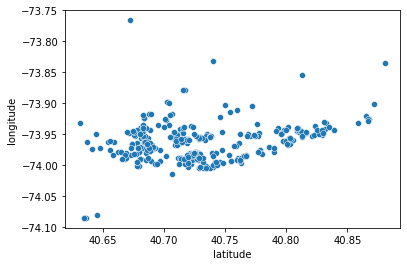

In [3]:
sns.scatterplot(data=df, x='latitude', y='longitude')

In [4]:
X2 = df[['latitude', 'longitude']]
X3 = df[['latitude', 'longitude', 'price']]

In [8]:
lat = 'latitude'
lon = 'longitude'

In [6]:
k_means = KMeans(n_clusters=6)
predictions = k_means.fit_predict(X2)

df['clusters'] = predictions

centroids = k_means.cluster_centers_
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

for i in range(6):
    centroids_x_dict[i] = centroids_x[i]
    centroids_y_dict[i] = centroids_y[i]
    colors_dict[i] = colors[i]

In [7]:
df['cen_x'] = df.clusters.map(centroids_x_dict)
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3,40.677937,-73.967837,#DF20C8
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,40.735543,-73.988864,#DF2020
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.812241,-73.943805,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3,40.677937,-73.967837,#DF20C8
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.812241,-73.943805,#81DF20


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

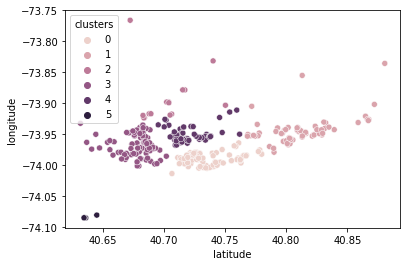

In [9]:
sns.scatterplot(data=df, x=lat, y=lon, hue=df.clusters)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

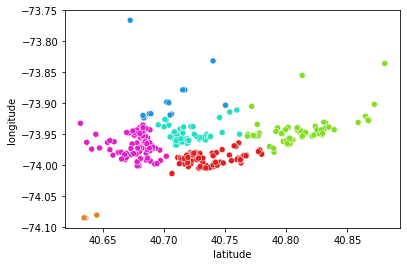

In [11]:
sns.scatterplot(data=df, x=lat, y=lon, c=df.color)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

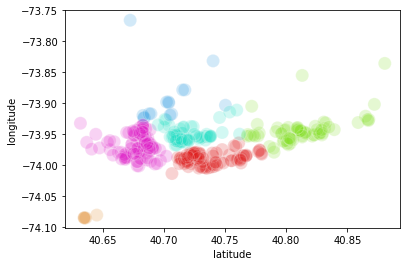

In [12]:
sns.scatterplot(data=df, x=lat, y=lon, c=df.color, alpha=0.2, s=170)

/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

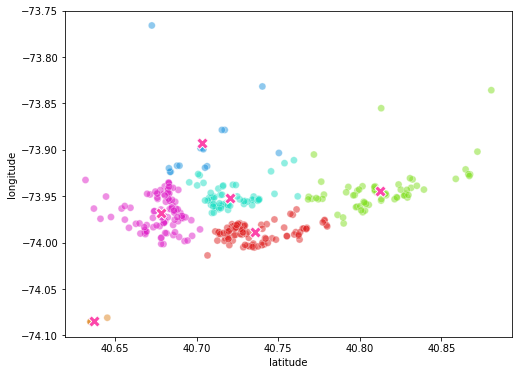

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x=lat, y=lon, s=50, alpha=0.5, c=df.color) 
sns.scatterplot(centroids_x, centroids_y, marker='X', c=['#FC46AA'], s=130)  

In [18]:
from scipy.spatial import ConvexHull
import numpy as np

[47 42 14 70 56 32 89 90 53 13]
[24 46  5 50 85 35 44 19]
[36 11 62  6 64 53 52 43]
[38 63 16 33 10 31 39]
[ 3  6 12  2 13  0]
[0 4 3 2]


/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


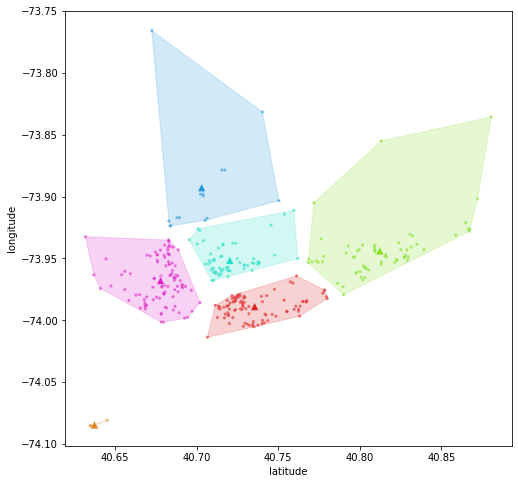

In [21]:
fig, ax = plt.subplots(1, figsize=(8,8))

sns.scatterplot(data=df, x=lat, y=lon, c=df.color, alpha=0.6, s=10)
sns.scatterplot(centroids_x, centroids_y, marker='^', c=colors, s=70)

for i in df.clusters.unique():
    points = df[df.clusters==i][[lat, lon]].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    print(hull.vertices)
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

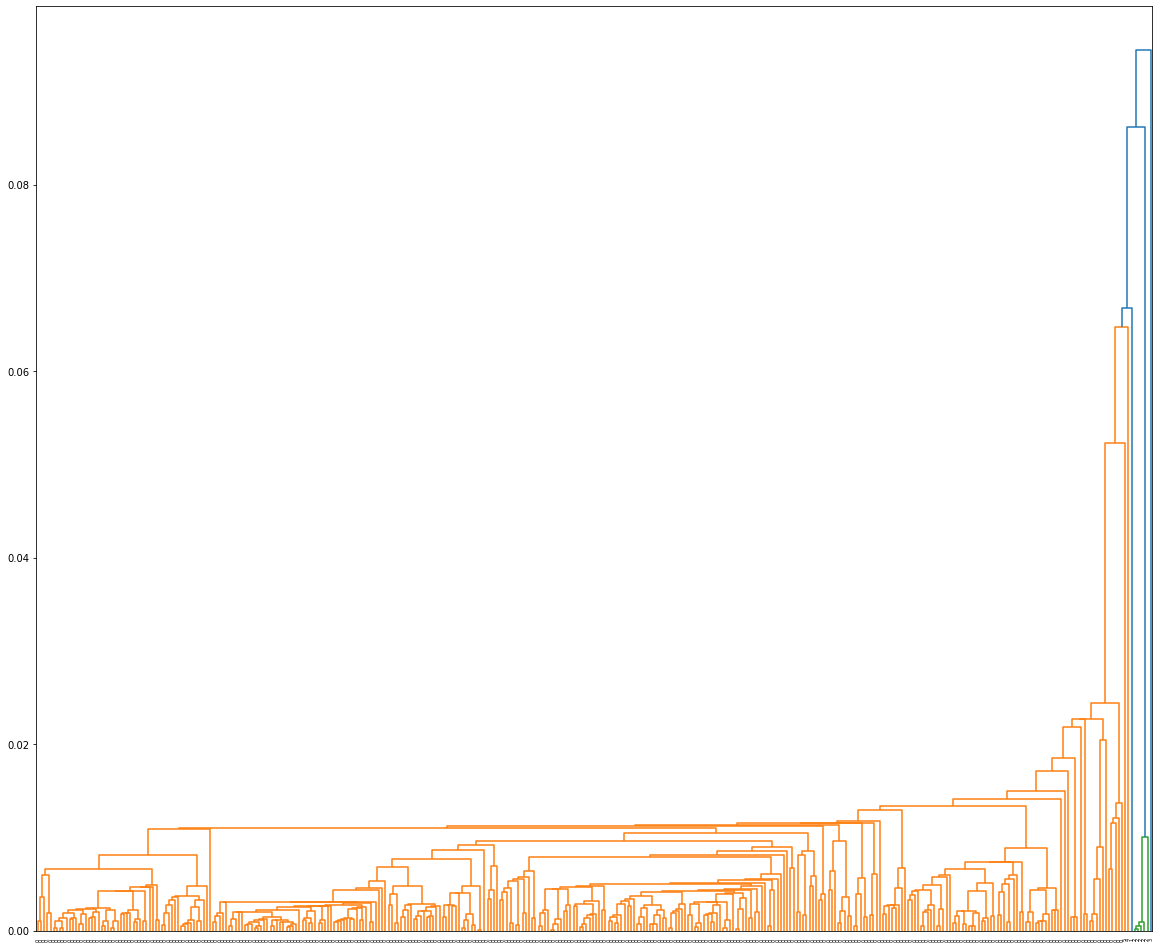

In [25]:
aggcl = AgglomerativeClustering(
    n_clusters=6, linkage='single'
)

predictions_ag_model = aggcl.fit_predict(X2)

# рассчитаем расстояния между кластерами
linked = linkage(X2, 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(
    Z=linked,
    orientation='top',
    labels=predictions_ag_model,
    distance_sort='descending'
)
plt.show()


In [27]:
from clustergram import Clustergram

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.027874231338500977 seconds.
K=3 fitted in 0.030110836029052734 seconds.
K=4 fitted in 0.03156232833862305 seconds.
K=5 fitted in 0.031348228454589844 seconds.
K=6 fitted in 0.03481554985046387 seconds.
K=7 fitted in 0.04188251495361328 seconds.
K=8 fitted in 0.03606772422790527 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

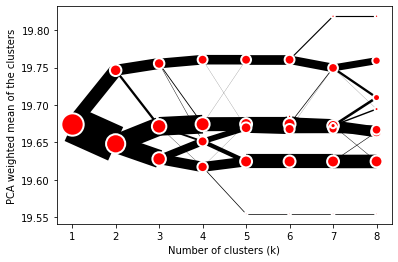

In [28]:
cgram = Clustergram(range(1,9), method='kmeans')
cgram.fit(X2)

cgram.plot()

In [29]:
k_means = KMeans(n_clusters=6)
k_means_predictions = k_means.fit_predict(X3)

df['cluster_3d'] = k_means_predictions

In [30]:
from mpl_toolkits.mplot3d import Axes3D

/tmp/ipykernel_29867/2945627722.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'price')

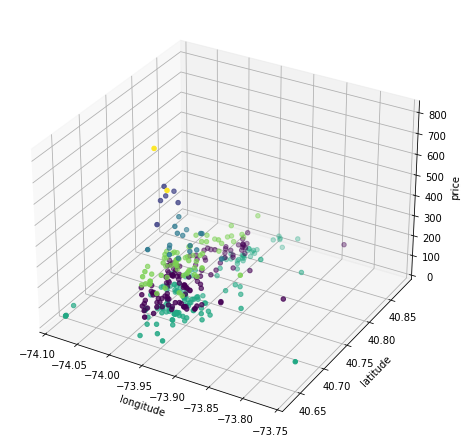

In [32]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.cluster_3d)

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

/tmp/ipykernel_29867/1951021038.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'price')

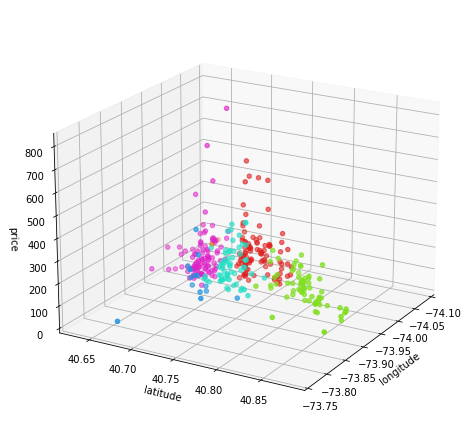

In [35]:


# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=df.longitude.to_list(), ys=df.latitude.to_list(), zs=df.price.to_list(), c=df.color)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [36]:
import plotly 
import plotly.express as px

In [37]:
fig = px.scatter_3d(
    data_frame=df,
    x=lon,
    y=lat,
    z='price',
    color='clusters',
    width=1000,
    height=700
)

fig.show()

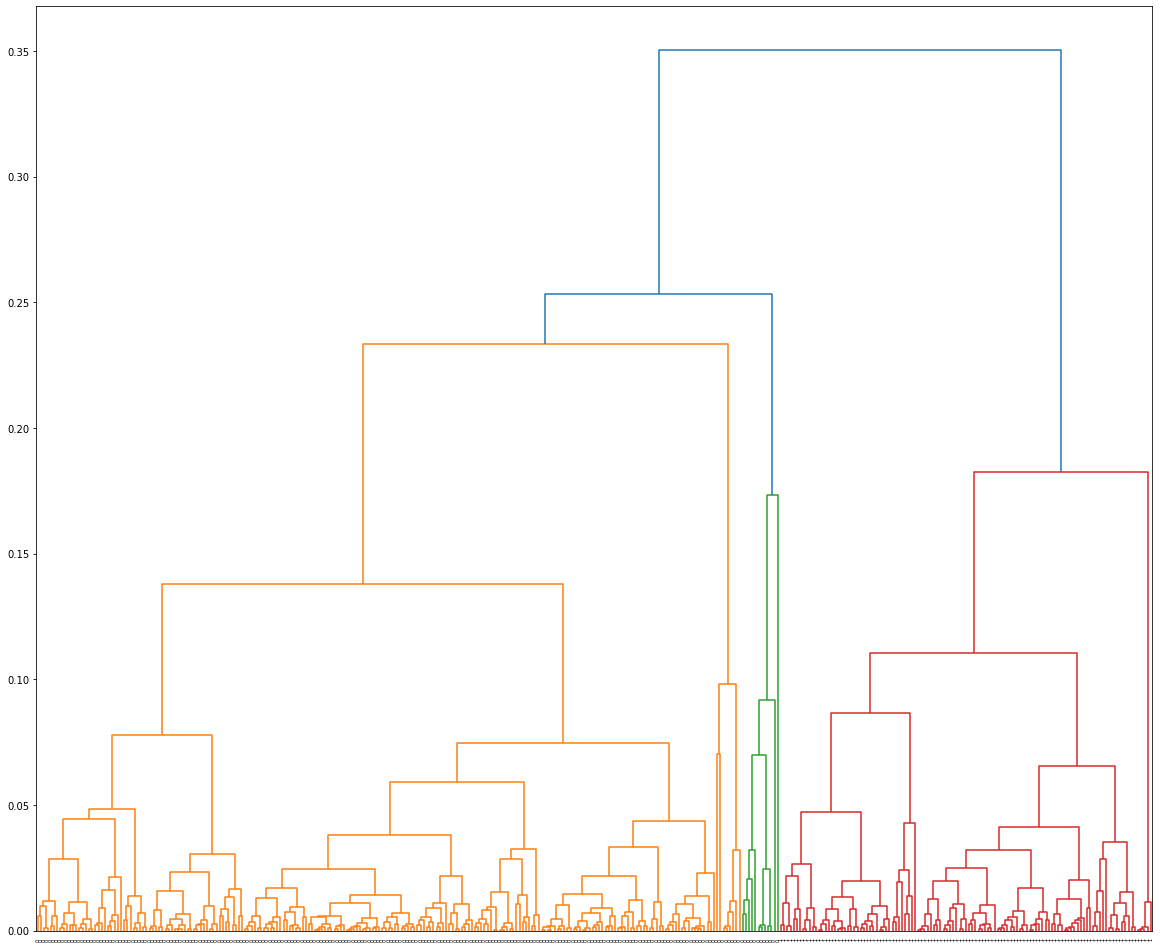

In [41]:
aggcl = AgglomerativeClustering(
    linkage='complete'
)

predictions = aggcl.fit_predict(X2)
linked = linkage(X2, 'complete')

plt.figure(figsize=(20,17))

dendrogram(
    Z=linked,
    orientation='top',
    labels=predictions,
    distance_sort='descending'
)
plt.show()

In [42]:
from sklearn.cluster import DBSCAN

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

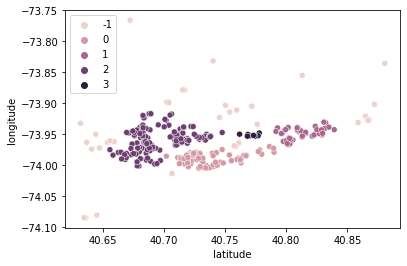

In [43]:
db = DBSCAN(eps=0.012, min_samples=6)
predictions = db.fit_predict(X2)

sns.scatterplot(data=df, x=lat, y=lon, hue=predictions)